In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=c5d498e22201ab08f3fb989d11fcf0bbea7394c2afad9343038a85f9f4f03074
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/My Drive/us/

/content/drive/My Drive/us


In [5]:
from pyspark.sql import SparkSession

# Step 1: Create a SparkSession
spark = SparkSession.builder \
    .appName("TRI Data Prediciting") \
    .getOrCreate()

# Step 2: Read each CSV file into a DataFrame
file_paths = ["/content/drive/MyDrive/us/2008_us.csv", "/content/drive/MyDrive/us/2009_us.csv", "/content/drive/MyDrive/us/2010_us.csv", "/content/drive/MyDrive/us/2011_us.csv", "/content/drive/MyDrive/us/2012_us.csv", "/content/drive/MyDrive/us/2013_us.csv", "/content/drive/MyDrive/us/2014_us.csv", "/content/drive/MyDrive/us/2015_us.csv", "/content/drive/MyDrive/us/2016_us.csv", "/content/drive/MyDrive/us/2017_us.csv", "/content/drive/MyDrive/us/2018_us.csv","/content/drive/MyDrive/us/2019_us.csv", "/content/drive/MyDrive/us/2020_us.csv", "/content/drive/MyDrive/us/2021_us.csv", "/content/drive/MyDrive/us/2022_us.csv"]  # List of CSV file paths

dataframes = []
for file_path in file_paths:
    df = spark.read.csv(file_path, header=True, inferSchema=True)
    dataframes.append(df)

# Step 3: Union all the DataFrames together
combined_df = dataframes[0]
for df in dataframes[1:]:
    combined_df = combined_df.union(df)


Let's take a look at the head of the dataframe using the show() function

In [6]:
combined_df.show(5,0)

+-------+---------------+------------+----------------------------------------------------+-----------------+---------+---------+-----+------+-------+------------------------------+------------+-------------+--------------------+------------------------+--------------------+---------------------------+--------------------+------------------------+-------------------+---------------+---------+---------+---------+---------+---------+-----------------+-----------+-----------+-----------+-----------+-----------+----------------+----------------------------------------------------------------+----------------------------+----------------------------+--------+----------+--------------------------+------------------+---------+--------------------------+--------------+-------+--------+-------------+-------------------+----------------------+-------------------+---------------+---------------------+----------------------------+------------------------------+---------------------+---------------

The dataframe consists of

In [7]:
# You can get the column names using the 'columns' attribute
column_names = combined_df.columns

# Print the column names
print("Column Names:")
for name in column_names:
   print(name)

Column Names:
1. YEAR
2. TRIFD
3. FRS ID
4. FACILITY NAME
5. STREET ADDRESS
6. CITY
7. COUNTY
8. ST
9. ZIP
10. BIA
11. TRIBE
12. LATITUDE
13. LONGITUDE
14. HORIZONTAL DATUM
15. PARENT CO NAME
16. PARENT CO DB NUM
17. STANDARD PARENT CO NAME
18. FEDERAL FACILITY
19. INDUSTRY SECTOR CODE
20. INDUSTRY SECTOR
21. PRIMARY SIC
22. SIC 2
23. SIC 3
24. SIC 4
25. SIC 5
26. SIC 6
27. PRIMARY NAICS
28. NAICS 2
29. NAICS 3
30. NAICS 4
31. NAICS 5
32. NAICS 6
33. DOC_CTRL_NUM
34. CHEMICAL
35. ELEMENTAL METAL INCLUDED
36. TRI CHEMICAL/COMPOUND ID
37. CAS#
38. SRS ID
39. CLEAN AIR ACT CHEMICAL
40. CLASSIFICATION
41. METAL
42. METAL CATEGORY
43. CARCINOGEN
44. PBT
45. PFAS
46. FORM TYPE
47. UNIT OF MEASURE
48. 5.1 - FUGITIVE AIR
49. 5.2 - STACK AIR
50. 5.3 - WATER
51. 5.4 - UNDERGROUND
52. 5.4.1 - UNDERGROUND CL I
53. 5.4.2 - UNDERGROUND C II-V
54. 5.5.1 - LANDFILLS
55. 5.5.1A - RCRA C LANDFILL
56. 5.5.1B - OTHER LANDFILLS
57. 5.5.2 - LAND TREATMENT
58. 5.5.3 - SURFACE IMPNDMNT
59. 5.5.3A - RCRA SURFA

### Exploratory Data Analysis
Now that we have seen the variable present in this dataset, let's perform some exploratory data analysis to further understand these data points

Let's start by counting the number of rows and columns in the dataframe

In [8]:
# Get the number of rows
num_rows = combined_df.count()

# Get the number of columns
num_cols = len(combined_df.columns)

# Print the shape
print("Shape of the DataFrame: ({}, {})".format(num_rows, num_cols))

Shape of the DataFrame: (1225914, 119)


Size of the Dataframe in GB?

In [9]:
from pyspark.sql.functions import *

combined_df.cache()

# Get the size of each row in bytes
row_size_in_bytes = len(combined_df.take(1)[0].__repr__().encode('utf-8'))

# Calculate the total size
total_size_in_bytes = num_rows * row_size_in_bytes

# Convert bytes to gigabytes
total_size_in_gb = total_size_in_bytes / (1024**3)

print(f"Total size of the DataFrame: {total_size_in_gb:.2f} GB")


Total size of the DataFrame: 3.53 GB


Let's change the column names for convenience

In [10]:
new_column_names = [
    "YEAR", "TRIFD", "FRS_ID", "FACILITY_NAME", "STREET_ADDRESS", "CITY", "COUNTY", "ST", "ZIP", "BIA", "TRIBE",
    "LATITUDE", "LONGITUDE", "HORIZONTAL_DATUM", "PARENT_CO_NAME", "PARENT_CO_DB_NUM", "STANDARD_PARENT_CO_NAME",
    "FEDERAL_FACILITY", "INDUSTRY_SECTOR_CODE", "INDUSTRY_SECTOR", "PRIMARY_SIC", "SIC_2", "SIC_3", "SIC_4",
    "SIC_5", "SIC_6", "PRIMARY_NAICS", "NAICS_2", "NAICS_3", "NAICS_4", "NAICS_5", "NAICS_6", "DOC_CTRL_NUM",
    "CHEMICAL", "ELEMENTAL_METAL_INCLUDED", "TRI_CHEMICAL_COMPOUND_ID", "CAS#", "SRS_ID", "CLEAN_AIR_ACT_CHEMICAL",
    "CLASSIFICATION", "METAL", "METAL_CATEGORY", "CARCINOGEN", "PBT", "PFAS", "FORM_TYPE", "UNIT_OF_MEASURE",
    "FUGITIVE_AIR", "STACK_AIR", "WATER", "UNDERGROUND", "UNDERGROUND_CL_I", "UNDERGROUND_C_II_V", "LANDFILLS",
    "RCRA_C_LANDFILL", "OTHER_LANDFILLS", "LAND_TREATMENT", "SURFACE_IMPNDMNT", "RCRA_SURFACE_IM", "OTHER_SURFACE_I",
    "OTHER_DISPOSAL", "ON_SITE_RELEASE_TOTAL", "POTW_TRNS_RLSE", "POTW_TRNS_TRT", "POTW_TOTAL_TRANSFERS", "M10",
    "M41", "M62", "M40_METAL", "M61_METAL", "M71", "M81", "M82", "M72", "M63", "M66", "M67", "M64", "M65", "M73",
    "M79", "M90", "M94", "M99", "OFF_SITE_RELEASE_TOTAL", "M20", "M24", "M26", "M28", "M93", "OFF_SITE_RECYCLED_TOTAL",
    "M56", "M92", "OFF_SITE_ENERGY_RECOVERY_T", "M40_NON_METAL", "M50", "M54", "M61_NON_METAL", "M69", "M95",
    "OFF_SITE_TREATED_TOTAL", "UNCLASSIFIED", "TOTAL_TRANSFER", "TOTAL_RELEASES", "RELEASES", "ON_SITE_CONTAINED",
    "ON_SITE_OTHER", "OFF_SITE_CONTAIN", "OFF_SITE_OTHER_R", "ENERGY_RECOVER_ON", "ENERGY_RECOVER_OFF", "RECYCLING_ON_SITE",
    "RECYCLING_OFF_SITE", "TREATMENT_ON_SITE", "TREATMENT_OFF_SITE", "PRODUCTION_WSTE", "ONE_TIME_RELEASE",
    "PROD_RATIO_OR_ACTIVITY", "PRODUCTION_RATIO"
]

# Rename the columns
data = combined_df.toDF(*new_column_names)

# Show the DataFrame with the new column names
data.show(5,0)

+----+---------------+------------+----------------------------------------------------+----------------+---------+---------+---+-----+---+------------------------------+--------+---------+----------------+------------------------+----------------+------------------------+----------------+--------------------+---------------+-----------+-----+-----+-----+-----+-----+-------------+-------+-------+-------+-------+-------+-------------+----------------------------------------------------------------+------------------------+------------------------+--------+------+----------------------+--------------+-----+--------------------------+----------+---+----+---------+---------------+------------+---------+-----+-----------+----------------+------------------+---------+---------------+---------------+--------------+----------------+---------------+---------------+--------------+---------------------+--------------+-------------+--------------------+---+---+---+---------+---------+---+---+---+-

How many unique facility names are present in the dataframe?

In [11]:
data.select('FACILITY_NAME').distinct().count()

29826

How many unique years are present in the dataframe?

In [12]:
data.select('YEAR').distinct().count()

15

Number of facilites listed each year

In [13]:
from pyspark.sql.functions import *
from pyspark.sql.types import *

data.groupBy('YEAR').agg(countDistinct('FACILITY_NAME').alias('facility_count')).orderBy(desc('facility_count')).show()

+----+--------------+
|YEAR|facility_count|
+----+--------------+
|2008|         19711|
|2014|         19348|
|2015|         19346|
|2018|         19274|
|2013|         19240|
|2019|         19202|
|2016|         19198|
|2017|         19124|
|2012|         19108|
|2009|         18973|
|2011|         18938|
|2022|         18929|
|2010|         18869|
|2020|         18813|
|2021|         18733|
+----+--------------+



Production Waste of facilities by year

In [14]:
data.groupBy('YEAR', 'FACILITY_NAME').agg(sum('PRODUCTION_WSTE').alias('production_waste_count')).orderBy(desc('production_waste_count')).show()

+----+--------------------+----------------------+
|YEAR|       FACILITY_NAME|production_waste_count|
+----+--------------------+----------------------+
|2017|ADVANSIX RESINS &...|      3.777527111199E9|
|2018|ADVANSIX RESINS &...|  3.7375192371470003E9|
|2020|ADVANSIX RESINS &...|      3.634405895533E9|
|2019|ADVANSIX RESINS &...|      3.628819851283E9|
|2014|ADVANSIX RESINS &...|      3.523300642288E9|
|2015|ADVANSIX RESINS &...|  3.4544861842999997E9|
|2016|ADVANSIX RESINS &...|       3.44357336016E9|
|2021|ADVANSIX RESINS &...|  3.1927472909330006E9|
|2022|ADVANSIX RESINS &...|      3.128234645665E9|
|2018|SABIC INNOVATIVE ...|  2.0491403806899998E9|
|2013|SABIC INNOVATIVE ...|       2.04167375138E9|
|2020|SABIC INNOVATIVE ...|       2.01453755997E9|
|2021|SABIC INNOVATIVE ...|  1.9609314936499999E9|
|2014|SABIC INNOVATIVE ...|       1.95977452326E9|
|2016|SABIC INNOVATIVE ...|   1.831241049369053E9|
|2017|SABIC INNOVATIVE ...|       1.76634215272E9|
|2019|SABIC INNOVATIVE ...|  1.

Facilities with maximum total releases by year

In [20]:
data.groupBy('YEAR', 'FACILITY_NAME').agg(sum('TOTAL_RELEASES').alias('total_releases')).orderBy(desc('total_releases')).show()

+----+--------------------+-------------------+
|YEAR|       FACILITY_NAME|     total_releases|
+----+--------------------+-------------------+
|2014|  RED DOG OPERATIONS|1.124384887783258E9|
|2017|  RED DOG OPERATIONS|1.082414488472233E9|
|2011|  RED DOG OPERATIONS|   9.893925494059E8|
|2013|  RED DOG OPERATIONS| 9.06386078728046E8|
|2018|  RED DOG OPERATIONS| 8.85682875982152E8|
|2012|  RED DOG OPERATIONS| 8.14003362633961E8|
|2010|  RED DOG OPERATIONS|    7.77395672196E8|
|2016|  RED DOG OPERATIONS|7.769739303205142E8|
|2019|  RED DOG OPERATIONS|7.692335142554001E8|
|2022|  RED DOG OPERATIONS|   6.586648876047E8|
|2009|  RED DOG OPERATIONS|     6.3752167829E8|
|2021|  RED DOG OPERATIONS|6.017848116464001E8|
|2015|  RED DOG OPERATIONS|  5.6122214576018E8|
|2020|  RED DOG OPERATIONS| 5.43282318454175E8|
|2008|  RED DOG OPERATIONS|    5.17196602779E8|
|2013|KENNECOTT UTAH CO...| 2.90490644447136E8|
|2021|NEVADA GOLD MINES...|      2.751992469E8|
|2017|KENNECOTT UTAH CO...| 2.3437309136

Facility name with the maximum production waste grouping by year.

In [16]:
from pyspark.sql.functions import *

data.groupBy('YEAR').agg(
    max(struct(col("PRODUCTION_WSTE"), col("FACILITY_NAME"))).alias('max_production_waste')
).select(
    col("YEAR"),
    col("max_production_waste.FACILITY_NAME").alias("facility_name"),
    col("max_production_waste.PRODUCTION_WSTE").alias("max_production_waste")
).show()


+----+--------------------+--------------------+
|YEAR|       facility_name|max_production_waste|
+----+--------------------+--------------------+
|2008|INCOBRASA INDUSTR...|        6.10930967E8|
|2009|INCOBRASA INDUSTR...|        6.58118289E8|
|2010|INCOBRASA INDUSTR...|        5.26788858E8|
|2011|INCOBRASA INDUSTR...|        6.34126515E8|
|2012|INCOBRASA INDUSTR...|        7.53561435E8|
|2013|SABIC INNOVATIVE ...|         1.6721548E9|
|2014|ADVANSIX RESINS &...|       3.505279349E9|
|2015|ADVANSIX RESINS &...|       3.437780484E9|
|2016|ADVANSIX RESINS &...|       3.424307903E9|
|2017|ADVANSIX RESINS &...|       3.754289726E9|
|2018|ADVANSIX RESINS &...|       3.720134675E9|
|2019|ADVANSIX RESINS &...|      3.6131340732E9|
|2020|ADVANSIX RESINS &...|       3.623825218E9|
|2021|ADVANSIX RESINS &...|        3.18178142E9|
|2022|ADVANSIX RESINS &...|       3.118577611E9|
+----+--------------------+--------------------+



Facility name with minimum production waste grouping by year.

In [23]:
data.groupBy('YEAR', 'FACILITY_NAME').agg(sum('PRODUCTION_WSTE').alias('total_production_waste')).orderBy(asc('total_production_waste')).show()

+----+--------------------+----------------------+
|YEAR|       FACILITY_NAME|total_production_waste|
+----+--------------------+----------------------+
|2008|TYSON CHICKEN INC...|                   0.0|
|2008|PIONEER MANUFACTU...|                   0.0|
|2008|         REYNOLDS CO|                   0.0|
|2008|NALCO COMPANY-HEB...|                   0.0|
|2008|PILGRIM'S PRIDE C...|                   0.0|
|2008|DOLE FRESH VEGETA...|                   0.0|
|2008|FISKE BROTHERS RE...|                   0.0|
|2008|R&S PROCESSING CO...|                   0.0|
|2008|GRIFFITH ENERGY -...|                   0.0|
|2008|MOHAWK INDUSTRIES...|                   0.0|
|2008|           ZEECO INC|                   0.0|
|2008|AKRON DISPERSIONS...|                   0.0|
|2008|O'CONNELL OIL NOR...|                   0.0|
|2008|  BULLEN MIDWEST INC|                   0.0|
|2008|PFFJ LLC--ARIZONA...|                   0.0|
|2008|FORTERRA CONCRETE...|                   0.0|
|2008|CARGILL ANIMAL NU...|    

Facilities with minimum total releases by year

In [21]:
data.groupBy('YEAR', 'FACILITY_NAME').agg(sum('TOTAL_RELEASES').alias('total_releases')).orderBy(asc('total_releases')).show()

+----+--------------------+--------------+
|YEAR|       FACILITY_NAME|total_releases|
+----+--------------------+--------------+
|2008|CONTINENTAL PRODU...|           0.0|
|2008|CHAMPLAIN CABLE CORP|           0.0|
|2008|KENNETH LYNCH & SONS|           0.0|
|2008|NEW FLYER OF AMERICA|           0.0|
|2008|GREAT SOUTHERN WO...|           0.0|
|2008|BERKSHIRE CONCRET...|           0.0|
|2008|TATE ACCESS FLOOR...|           0.0|
|2008|PFFJ LLC--ARIZONA...|           0.0|
|2008|MOHAWK INDUSTRIES...|           0.0|
|2008|     MICROPOSITE INC|           0.0|
|2008| SPECIALTY GLASS INC|           0.0|
|2008|RANDALL BEARINGS ...|           0.0|
|2008|GENERAL MILLS REE...|           0.0|
|2008|LAND O LAKES - TU...|           0.0|
|2008|CARGILL FEED & NU...|           0.0|
|2008|        GRAYHILL INC|           0.0|
|2008|NORTHEAST LAMP RE...|           0.0|
|2008|LAND O'LAKES PURI...|           0.0|
|2008|MUNSON LAKES NUTR...|           0.0|
|2008|HIGHLAND LAKES QU...|           0.0|
+----+-----

Total Production Waste by year

In [25]:
data.groupBy('YEAR').agg(sum('PRODUCTION_WSTE').alias('total_production_waste')).orderBy(desc('total_production_waste')).show()

+----+----------------------+
|YEAR|total_production_waste|
+----+----------------------+
|2018|  3.215906341751404...|
|2019|   3.06475580182866E10|
|2014|  2.998790612150506E10|
|2017|  2.950953788744012...|
|2015|  2.946780819099611E10|
|2021|  2.930427522588205...|
|2016|  2.885370002029752...|
|2022|  2.857749046232676...|
|2020|  2.847098730909983...|
|2013|  2.661638946172779...|
|2012|  2.425991110931636E10|
|2008|  2.310735180284435...|
|2011|  2.272282366502031E10|
|2010|  2.154781662429972E10|
|2009|  2.046365511556098...|
+----+----------------------+



Total Releases by year

In [24]:
data.groupBy('YEAR').agg(sum('TOTAL_RELEASES').alias('total_release')).orderBy(desc('total_release')).show()

+----+--------------------+
|YEAR|       total_release|
+----+--------------------+
|2013| 4.185433226347844E9|
|2011| 4.150359679159177E9|
|2014|4.0259141797093024E9|
|2017|4.0088890121791887E9|
|2008|3.9788797126063805E9|
|2010|3.8503399343270884E9|
|2018|3.7485832669114013E9|
|2015| 3.742950712297206E9|
|2012| 3.675292198303748E9|
|2016|3.6108233541860924E9|
|2009| 3.437543319089844E9|
|2019|3.4267518495951214E9|
|2022|3.3169193918126926E9|
|2021| 3.270271743237934E9|
|2020| 3.095991557198027E9|
+----+--------------------+



Filling null values in the "ONE-TIME RELEASE" column with 0

In [28]:
data1 = data.fillna(0, subset=['ONE_TIME_RELEASE'])

Creating new columns in the dataframe each concontaining the sum of the its sub columns

In [29]:
from pyspark.sql.functions import col


# Create new columns and calculate the sum of respective columns
data = data1.withColumn("TOTAL_ENERGY_RECOVER", col("ENERGY_RECOVER_ON") + col("ENERGY_RECOVER_OFF")) \
           .withColumn("TOTAL_RECYCLING", col("RECYCLING_ON_SITE") + col("RECYCLING_OFF_SITE")) \
           .withColumn("TOTAL_TREATMENT", col("TREATMENT_ON_SITE") + col("TREATMENT_OFF_SITE")) \
           .withColumn("TOTAL_DISPOSALS", col("TOTAL_RELEASES") + col("ONE_TIME_RELEASE"))

# Show the DataFrame with the new columns
data.show(5,0)


+----+---------------+------------+----------------------------------------------------+----------------+---------+---------+---+-----+---+------------------------------+--------+---------+----------------+------------------------+----------------+------------------------+----------------+--------------------+---------------+-----------+-----+-----+-----+-----+-----+-------------+-------+-------+-------+-------+-------+-------------+----------------------------------------------------------------+------------------------+------------------------+--------+------+----------------------+--------------+-----+--------------------------+----------+---+----+---------+---------------+------------+---------+-----+-----------+----------------+------------------+---------+---------------+---------------+--------------+----------------+---------------+---------------+--------------+---------------------+--------------+-------------+--------------------+---+---+---+---------+---------+---+---+---+-

Total Engery reovery by year

In [30]:
data.groupBy('YEAR').agg(sum('TOTAL_ENERGY_RECOVER').alias('total_energy_recovery')).orderBy(desc('total_energy_recovery')).show()

+----+---------------------+
|YEAR|total_energy_recovery|
+----+---------------------+
|2014|  3.137641519145215E9|
|2018| 3.1205299520957212E9|
|2021| 3.0079012634778223E9|
|2019| 2.9909163269312716E9|
|2015|  2.987834759638371E9|
|2017|   2.98057798675807E9|
|2016| 2.9711866489640484E9|
|2022| 2.9186294048348727E9|
|2020|  2.868968503417989E9|
|2013|   2.72734219810114E9|
|2008|  2.679160260640836E9|
|2012|  2.670361592787004E9|
|2011|  2.465640782221325E9|
|2010| 2.4116884794522495E9|
|2009|  2.236504826095155E9|
+----+---------------------+



In [31]:
data.groupBy('FACILITY_NAME').agg(sum('TOTAL_ENERGY_RECOVER').alias('total_energy_recovery')).orderBy(desc('total_energy_recovery')).show()

+--------------------+---------------------+
|       FACILITY_NAME|total_energy_recovery|
+--------------------+---------------------+
|HUNTSMAN PETROCHE...| 1.5987884855870004E9|
|BUZZI UNICEM USA-...|     1.337498118154E9|
|MOTIVA-PORT ARTHU...|        1.197636683E9|
|FORMOSA PLASTICS ...|      1.13231980633E9|
|  USS-CLAIRTON PLANT|        1.132013181E9|
|LYONDELL CHEMICAL CO|  8.972080815466001E8|
|    BIG WEST OIL LLC|        8.473212709E8|
|OQ CHEMICALS CORP...|  8.030364581232871E8|
|MARATHON PETROLEU...|       7.7831831684E8|
|JEFFERSON TERMINA...|       7.5506648424E8|
|ECO SERVICES OPER...|  7.056100398339999E8|
|DOW CHEMICAL CO F...|      6.87962157046E8|
|HOLCIM (US) (INCL...|       6.3974517264E8|
|HEIDELBERG MATERI...|       5.9076754663E8|
|WYNNEWOOD REFININ...|  5.852079706980001E8|
|MOTIVA - PORT ART...|         5.17151452E8|
|INV NYLON CHEMICA...|           5.109804E8|
|PREMCOR REFINING ...|        4.911170324E8|
|CHEMTRADE SOLUTIO...|         4.73164244E8|
|         

Total Recycling by year

In [32]:
data.groupBy('YEAR').agg(sum('TOTAL_RECYCLING').alias('total_recycling')).orderBy(desc('total_recycling')).show()

+----+--------------------+
|YEAR|     total_recycling|
+----+--------------------+
|2018|1.664023139897899E10|
|2019|1.590085125925090...|
|2020|1.506667991192252...|
|2021|1.495262059629404...|
|2022|1.457897431101927E10|
|2014|1.412890349915272...|
|2017|1.383578724774903...|
|2015|1.364694660615124...|
|2016|1.353804148676350...|
|2013|1.108175315216566...|
|2012| 9.208920501082432E9|
|2008|  8.94135073799782E9|
|2011| 8.663021460572811E9|
|2010|  7.85224579308823E9|
|2009| 7.789739150138208E9|
+----+--------------------+



In [33]:
data.groupBy('FACILITY_NAME').agg(sum('TOTAL_RECYCLING').alias('total_recycling')).orderBy(desc('total_recycling')).show()

+--------------------+--------------------+
|       FACILITY_NAME|     total_recycling|
+--------------------+--------------------+
|ADVANSIX RESINS &...|     3.2307302959E10|
|SABIC INNOVATIVE ...|1.586758095158500...|
|INCOBRASA INDUSTR...|     1.3185645857E10|
|SABIC INNOVATIVE ...|     9.16789574846E9|
|SYNGENTA CROP PRO...|       6.750592331E9|
|HONEYWELL INTERNA...|     4.64887046666E9|
|    US MAGNESIUM LLC|       3.698053491E9|
|ASHLAND SPECIALTY...|       2.306523546E9|
|NORTH AMERICAN ST...|     1.79787071139E9|
|         KENSING LLC|     1.54189127103E9|
|   WESTLAKE US 2 LLC|     1.52977982013E9|
|ZEON CHEMICALS LP...|       1.457786291E9|
|FORTRON INDUSTRIE...|       1.424704937E9|
|SHELL NORCO CHEMI...|   1.3949088770807E9|
|INEOS BATTLEGROUN...|     1.28310886001E9|
|NAN YA PLASTICS C...|     1.27391189972E9|
| AURUBIS BUFFALO INC|     1.20821954638E9|
|       TPC GROUP LLC|       1.180073427E9|
|FIRESTONE POLYMER...|       1.094678543E9|
|LUBRIZOL ADVANCED...|       1.0

Total Treatment by year

In [34]:
data.groupBy('YEAR').agg(sum('TOTAL_TREATMENT').alias('total_treatment')).orderBy(desc('total_treatment')).show()

+----+-------------------+
|YEAR|    total_treatment|
+----+-------------------+
|2015|9.104907793391502E9|
|2013|8.802930267437046E9|
|2016|8.739662895170937E9|
|2014|8.704757971960152E9|
|2012| 8.69736962086837E9|
|2017|8.693296451994581E9|
|2018| 8.65469906293795E9|
|2019|8.333868407162554E9|
|2021|8.109816377238657E9|
|2022|7.778361986765473E9|
|2008| 7.50663904366638E9|
|2020|7.442956528378216E9|
|2011|7.431313986009928E9|
|2010|7.422963109446992E9|
|2009|6.983655705861984E9|
+----+-------------------+



In [37]:
data.groupBy('FACILITY_NAME').agg(sum('TOTAL_TREATMENT').alias('total_treatment')).orderBy(desc('total_treatment')).show()

+--------------------+--------------------+
|       FACILITY_NAME|     total_treatment|
+--------------------+--------------------+
|     THE CHEMOURS CO|3.8075988255660105E9|
|DELAWARE CITY REF...|3.1814735638218207E9|
|OCCIDENTAL CHEMIC...| 1.631953855130607E9|
|ST CHARLES OPERAT...|1.5160526509038348E9|
|THE DOW CHEMICAL ...|1.4984953453275404E9|
|DOW CHEMICAL CO F...|1.4174924118976395E9|
|BASF CORP - FREEP...|       1.300299359E9|
|FORMOSA PLASTICS ...|1.1798610601183937E9|
|OXY VINYLS LP DEE...|1.0403484284398702E9|
|DOW SABINE RIVER ...|1.0303955472460496E9|
|WESTLAKE CHEMICAL...| 9.519564096468601E8|
|  WESTLAKE VINYLS CO| 9.191856831757782E8|
|ARKEMA INC CLEAR ...|     9.04107967597E8|
|    US MAGNESIUM LLC|  9.02087564999331E8|
|COFFEYVILLE RESOU...|       8.516179084E8|
|     GAVIN POWER LLC|        7.96474646E8|
|CLEAN HARBORS DEE...|  7.65744319119069E8|
|SHELL NORCO CHEMI...|    7.539671575727E8|
|OXY VINYLS LP LA ...| 7.163033186671991E8|
|INV NYLON CHEMICA...|        6.

Total Disposals by year

In [35]:
data.groupBy('YEAR').agg(sum('TOTAL_DISPOSALS').alias('total_disposals')).orderBy(desc('total_disposals')).show()

+----+--------------------+
|YEAR|     total_disposals|
+----+--------------------+
|2013| 4.389317907197339E9|
|2011|4.1649440196971407E9|
|2014| 4.039713034265948E9|
|2017| 4.022469165982856E9|
|2008|4.0127164239826736E9|
|2010| 3.863673982296255E9|
|2015| 3.760352373867341E9|
|2018|3.7564403495143814E9|
|2012|3.6895905182801466E9|
|2016| 3.625043588901455E9|
|2009|3.4484897894960184E9|
|2019| 3.434124866264098E9|
|2022| 3.335326336623211E9|
|2021|  3.30906257512558E9|
|2020|3.1034969904176216E9|
+----+--------------------+



In [36]:
data.groupBy('FACILITY_NAME').agg(sum('TOTAL_DISPOSALS').alias('total_disposals')).orderBy(desc('total_disposals')).show()

+--------------------+--------------------+
|       FACILITY_NAME|     total_disposals|
+--------------------+--------------------+
|  RED DOG OPERATIONS|1.164553980431191...|
|KENNECOTT UTAH CO...|2.5056435391859875E9|
|NEVADA GOLD MINES...|1.2370791666561818E9|
|NEWMONT GOLDCORP ...|     1.19208414731E9|
|HECLA GREENS CREE...| 7.898033236499999E8|
|NEVADA GOLD MINES...| 7.199097565445942E8|
|NEVADA GOLD MINES...|      6.4334398362E8|
|NEVADA GOLD MINES...| 4.569392934499999E8|
|KENNECOTT UTAH CO...| 4.282137758142559E8|
|MONTANA RESOURCES...|    4.193485754648E8|
|ASCEND PERFORMANC...|4.0621615065739995E8|
|KENNECOTT BARNEYS...|3.8607702625918996E8|
|BASIN ELECTRIC AN...|  3.66298744226562E8|
|FREEPORT-MCMORAN ...| 3.610948317293091E8|
|ASCEND PERFORMANC...|3.5514852224600005E8|
|ASARCO LLC RAY CO...|3.2761639059788007E8|
|      USS GARY WORKS|  3.03899729080458E8|
|ROBINSON NEVADA M...|       2.770248017E8|
|NEWMONT GOLDCORP ...|2.7437543710999995E8|
|BAYER CROPSCIENCE LP|2.66844467

In [38]:
from pyspark.sql.functions import when
for column in ["CLEAN_AIR_ACT_CHEMICAL", "CARCINOGEN", "PBT", "PFAS"]:
    data = data.withColumn(f"converted_{column}", when(data[column] == "YES", 1).otherwise(0))

# Show the DataFrame with the converted columns
data.show(5,0)


+----+---------------+------------+----------------------------------------------------+----------------+---------+---------+---+-----+---+------------------------------+--------+---------+----------------+------------------------+----------------+------------------------+----------------+--------------------+---------------+-----------+-----+-----+-----+-----+-----+-------------+-------+-------+-------+-------+-------+-------------+----------------------------------------------------------------+------------------------+------------------------+--------+------+----------------------+--------------+-----+--------------------------+----------+---+----+---------+---------------+------------+---------+-----+-----------+----------------+------------------+---------+---------------+---------------+--------------+----------------+---------------+---------------+--------------+---------------------+--------------+-------------+--------------------+---+---+---+---------+---------+---+---+---+-

Number of Clean Air act chemicals released by year

In [39]:
data.groupBy('YEAR').agg(sum('converted_CLEAN_AIR_ACT_CHEMICAL').alias('total_clean_air_act_chemical')).orderBy(desc('total_clean_air_act_chemical')).show()

+----+----------------------------+
|YEAR|total_clean_air_act_chemical|
+----+----------------------------+
|2008|                       55626|
|2014|                       52564|
|2011|                       52484|
|2013|                       52401|
|2010|                       52385|
|2012|                       52317|
|2009|                       52088|
|2015|                       51882|
|2017|                       51040|
|2016|                       51003|
|2018|                       50878|
|2019|                       50015|
|2022|                       49094|
|2020|                       48414|
|2021|                       48030|
+----+----------------------------+



Number of Clean Air act chemicals released by a facility

In [40]:
data.groupBy('FACILITY_NAME').agg(sum('converted_CLEAN_AIR_ACT_CHEMICAL').alias('total_clean_air_act_chemical')).orderBy(desc('total_clean_air_act_chemical')).show()

+--------------------+----------------------------+
|       FACILITY_NAME|total_clean_air_act_chemical|
+--------------------+----------------------------+
| SHERWIN-WILLIAMS CO|                        3761|
|           BASF CORP|                        2004|
|TESORO LOS ANGELE...|                        1794|
|HERITAGE THERMAL ...|                        1756|
|VEOLIA ES TECHNIC...|                        1698|
|CLEAN HARBORS DEE...|                        1652|
|CLEAN HARBORS EL ...|                        1521|
|DOW CHEMICAL CO F...|                        1199|
|THE DOW CHEMICAL ...|                        1129|
|CLEAN HARBORS ARA...|                        1122|
|WESTLAKE CHEMICAL...|                        1101|
|ROSS INCINERATION...|                        1077|
|    VEOLIA N.A. INC.|                        1072|
|      PRECOAT METALS|                        1012|
|CLEAN HARBORS ENV...|                         895|
|UNIVAR SOLUTIONS ...|                         890|
| NEXEO SOLU

Number of Carcinogens released by year

In [41]:
data.groupBy('YEAR').agg(sum('converted_CARCINOGEN').alias('total_carcinogen')).orderBy(desc('total_carcinogen')).show()

+----+----------------+
|YEAR|total_carcinogen|
+----+----------------+
|2008|           24749|
|2014|           23697|
|2013|           23685|
|2011|           23672|
|2012|           23636|
|2010|           23522|
|2015|           23439|
|2017|           23405|
|2018|           23387|
|2009|           23294|
|2016|           23095|
|2019|           22835|
|2022|           22405|
|2020|           22229|
|2021|           22006|
+----+----------------+



Number of Carcinogens released by facility

In [42]:
data.groupBy('FACILITY_NAME').agg(sum('converted_CARCINOGEN').alias('total_carcinogen')).orderBy(desc('total_carcinogen')).show()

+--------------------+----------------+
|       FACILITY_NAME|total_carcinogen|
+--------------------+----------------+
| SHERWIN-WILLIAMS CO|            1478|
|HERITAGE THERMAL ...|            1326|
|VEOLIA ES TECHNIC...|            1152|
|CLEAN HARBORS DEE...|            1036|
|           BASF CORP|             978|
|CLEAN HARBORS EL ...|             862|
|   STELLA-JONES CORP|             774|
|TESORO LOS ANGELE...|             750|
|DOW CHEMICAL CO F...|             748|
|CLEAN HARBORS ARA...|             707|
|ROSS INCINERATION...|             644|
|THE DOW CHEMICAL ...|             636|
|WESTLAKE CHEMICAL...|             581|
|    VEOLIA N.A. INC.|             545|
|CLEAN HARBORS ENV...|             530|
|OCCIDENTAL CHEMIC...|             474|
| THE DOW CHEMICAL CO|             453|
|EQUISTAR CHEMICAL...|             428|
|         NORLITE LLC|             410|
|SUPERIOR INDUSTRI...|             395|
+--------------------+----------------+
only showing top 20 rows



Number of PBT released by year

In [43]:
data.groupBy('YEAR').agg(sum('converted_PBT').alias('total_PBT')).orderBy(desc('total_PBT')).show()

+----+---------+
|YEAR|total_PBT|
+----+---------+
|2008|    15479|
|2009|    14803|
|2013|    14635|
|2010|    14578|
|2012|    14528|
|2011|    14508|
|2014|    14498|
|2015|    14398|
|2016|    14023|
|2017|    13967|
|2018|    13879|
|2019|    13570|
|2020|    13200|
|2021|    13031|
|2022|    12992|
+----+---------+



Number of PBT released by facility

In [44]:
data.groupBy('FACILITY_NAME').agg(sum('converted_PBT').alias('total_PBT')).orderBy(desc('total_PBT')).show()

+--------------------+---------+
|       FACILITY_NAME|total_PBT|
+--------------------+---------+
|OLDCASTLE PRECAST...|      797|
|   STELLA-JONES CORP|      544|
|TILCON CONNECTICU...|      448|
|OLDCASTLE LAWN & ...|      445|
|     CERTAINTEED LLC|      370|
|TESORO LOS ANGELE...|      354|
|        US GYPSUM CO|      344|
|OWENS CORNING ROO...|      317|
|     WESTROCK CP LLC|      316|
| SHERWIN-WILLIAMS CO|      296|
|TMS INTERNATIONAL...|      278|
|HYDRO EXTRUSION U...|      265|
|GRAPHIC PACKAGING...|      263|
|    VEOLIA N.A. INC.|      262|
|CLEAN HARBORS DEE...|      239|
|CLEAN HARBORS ARA...|      235|
| RAIN CII CARBON LLC|      234|
|HEIDELBERG MATERI...|      232|
|REAL ALLOY RECYCL...|      225|
|    ARDAGH GLASS INC|      221|
+--------------------+---------+
only showing top 20 rows



Number of PFAS released by year

In [45]:
data.groupBy('YEAR').agg(sum('converted_PFAS').alias('total_PFAS')).orderBy(desc('total_PFAS')).show()

+----+----------+
|YEAR|total_PFAS|
+----+----------+
|2022|       132|
|2020|        96|
|2021|        86|
|2008|         0|
|2009|         0|
|2010|         0|
|2011|         0|
|2012|         0|
|2013|         0|
|2014|         0|
|2015|         0|
|2016|         0|
|2017|         0|
|2018|         0|
|2019|         0|
+----+----------+



Number of PFAS released by facility

In [46]:
data.groupBy('FACILITY_NAME').agg(sum('converted_PFAS').alias('total_PFAS')).orderBy(desc('total_PFAS')).show()

+--------------------+----------+
|       FACILITY_NAME|total_PFAS|
+--------------------+----------+
|VEOLIA ES TECHNIC...|        25|
|CLEAN HARBORS EL ...|        20|
|CHEMICAL WASTE MA...|        18|
|3M COTTAGE GROVE ...|        16|
|MACDERMID ENTHONE...|        12|
|CLEAN HARBORS ENV...|        10|
|    EXFLUOR RESEARCH|        10|
|CLEAN HARBORS ARA...|        10|
|CLEAN HARBORS DEE...|        10|
|INNOVATIVE CHEMIC...|         9|
|LYMTAL INTERNATIO...|         9|
|CHEMOURS WASHINGT...|         8|
|BASF CORP - FREEP...|         8|
|           ORTEC INC|         7|
|US ECOLOGY NEVADA...|         7|
| WYOMING REFINING CO|         6|
|TM DEER PARK SERV...|         6|
|          GOODWIN CO|         6|
|CHEMOURS CO - FAY...|         6|
|     BETCO CORP - BG|         6|
+--------------------+----------+
only showing top 20 rows



### Data Pre-processing
 Now that we have analyzed the dataset and have a better understand of each data point, we need to prepare the data to feed into the machine learning algorithm

In [47]:
data.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- TRIFD: string (nullable = true)
 |-- FRS_ID: long (nullable = true)
 |-- FACILITY_NAME: string (nullable = true)
 |-- STREET_ADDRESS: string (nullable = true)
 |-- CITY: string (nullable = true)
 |-- COUNTY: string (nullable = true)
 |-- ST: string (nullable = true)
 |-- ZIP: integer (nullable = true)
 |-- BIA: integer (nullable = true)
 |-- TRIBE: string (nullable = true)
 |-- LATITUDE: double (nullable = true)
 |-- LONGITUDE: double (nullable = true)
 |-- HORIZONTAL_DATUM: string (nullable = true)
 |-- PARENT_CO_NAME: string (nullable = true)
 |-- PARENT_CO_DB_NUM: string (nullable = true)
 |-- STANDARD_PARENT_CO_NAME: string (nullable = true)
 |-- FEDERAL_FACILITY: string (nullable = true)
 |-- INDUSTRY_SECTOR_CODE: integer (nullable = true)
 |-- INDUSTRY_SECTOR: string (nullable = true)
 |-- PRIMARY_SIC: string (nullable = true)
 |-- SIC_2: string (nullable = true)
 |-- SIC_3: string (nullable = true)
 |-- SIC_4: string (nullable = tru

From the dataset above, we need to create multiple waste management segements based on techniques used.

The variables in this dataset are in format that cannot be easily ingest into the waste management segmentation model. These features individually do not tell us much about waste management behaviour.

Due to this, we will use the existing variable to derive three new informative features - recycling, enerygy recovery, treatment, disposal or other releases.


We will now preprocess the dataframe to create the above variables.

In [48]:
data1 = data.groupby('YEAR', 'FACILITY_NAME') \
            .agg(sum('TOTAL_RECYCLING').alias('RECYCLING'),
                 sum('TOTAL_ENERGY_RECOVER').alias('ENERGY_RECOVER'),
                 sum('TOTAL_TREATMENT').alias('TREATMENT'),
                 sum('TOTAL_DISPOSALS').alias('DISPOSAL'),
                 sum('PRODUCTION_WSTE').alias('PROD_WASTE'))

data1 = data1.orderBy('YEAR')


In [49]:
data1.show(5,0)

+----+---------------------------------------+---------+--------------+-----------+-----------------+-----------------+
|YEAR|FACILITY_NAME                          |RECYCLING|ENERGY_RECOVER|TREATMENT  |DISPOSAL         |PROD_WASTE       |
+----+---------------------------------------+---------+--------------+-----------+-----------------+-----------------+
|2008|VALERO REFINING CO - TENNESSEE L.L.C.  |38139.0  |2031222.0     |3402971.4  |168417.4         |5640749.8        |
|2008|PHILLIPS 66  - ALLIANCE REFINERY       |41.6539  |29.0          |5964936.893|638961.5945      |6604839.1412     |
|2008|ADAMS THERMAL SYSTEMS INC.             |43457.0  |0.0           |0.0        |96.96000000000001|43553.95999999999|
|2008|MARTIN MARIETTA SOUTH TEXAS CEMENT LLC.|0.0      |6607160.0     |0.0        |9181.783797      |6616342.558443001|
|2008|PAC RANCHO FOUNDRY                     |2260.0   |0.0           |0.0        |1102.5           |2865.5           |
+----+----------------------------------

In [50]:
data1.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- FACILITY_NAME: string (nullable = true)
 |-- RECYCLING: double (nullable = true)
 |-- ENERGY_RECOVER: double (nullable = true)
 |-- TREATMENT: double (nullable = true)
 |-- DISPOSAL: double (nullable = true)
 |-- PROD_WASTE: double (nullable = true)



Since Production waste column is the sum of all the other columns doesn't have any individual value to itself so it is better to drop it.

In [51]:
df = data1.drop('PROD_WASTE')

In [52]:
df.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- FACILITY_NAME: string (nullable = true)
 |-- RECYCLING: double (nullable = true)
 |-- ENERGY_RECOVER: double (nullable = true)
 |-- TREATMENT: double (nullable = true)
 |-- DISPOSAL: double (nullable = true)



In [53]:
# Get the number of rows
num_rows = df.count()

# Get the number of columns
num_cols = len(df.columns)

# Print the shape
print("Shape of the DataFrame: ({}, {})".format(num_rows, num_cols))

Shape of the DataFrame: (286806, 6)


In [56]:
from pyspark.sql.functions import *

df.cache()

# Get the size of each row in bytes
row_size_in_bytes = len(df.take(1)[0].__repr__().encode('utf-8'))

# Calculate the total size
total_size_in_bytes = num_rows * row_size_in_bytes
print(f"Total size of the Dataframe: {total_size_in_bytes:2f} KB")

# Calculate the total size
total_size_in_bytes = num_rows * row_size_in_bytes
total_size_in_mb = total_size_in_bytes / 1024 / 1024  # Convert bytes to megabytes
print(f"Total size of the Dataframe: {total_size_in_mb:.2f} MB")

# Convert bytes to gigabytes
total_size_in_gb = total_size_in_bytes / (1024**3)

print(f"Total size of the DataFrame: {total_size_in_gb:.2f} GB")

Total size of the Dataframe: 42734094.000000 KB
Total size of the Dataframe: 40.75 MB
Total size of the DataFrame: 0.04 GB


### Standardization

Before building the facilities segmentation model, let's standardize the dataframe to ensure that all the variables are around the same scale:

In [57]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler

assemble=VectorAssembler(inputCols=[
    'YEAR','RECYCLING','ENERGY_RECOVER', 'TREATMENT', 'DISPOSAL'
], outputCol='features')

assembled_data=assemble.transform(df)

scale=StandardScaler(inputCol='features',outputCol='standardized')
data_scale=scale.fit(assembled_data)
data_scale_output=data_scale.transform(assembled_data)

To view the standardized feature vector looks like:

In [58]:
data_scale_output.select('standardized').show(2,truncate=False)

+------------------------------------------------------------------------------------------------------+
|standardized                                                                                          |
+------------------------------------------------------------------------------------------------------+
|[465.34066402879466,1.677431544164269E-6,1.2018557941681116E-5,1.2436916955959354,0.10331239896549921]|
|[465.34066402879466,0.0,2.7382253548261315,0.0,0.0014845839233779178]                                 |
+------------------------------------------------------------------------------------------------------+
only showing top 2 rows



These are the scaled features that will be fed into the clustering algorithm.

### Building the Machine Learning Model

Now that we have completed all the data analysis and preparation, let's build the K-Means clustering model.



i) Finding the number of clusters to use

When building a K-Means clustering model, we first need to determine the number of clusters or groups we want the algorithm to return. If we decide on three clusters, for instance, then we will have three customer segments.

The most popular technique used to decide on how many clusters to use in K-Means is called the “elbow-method.”

This is done simply running the K-Means algorithm for a wide range of clusters and visualizing the model results for each cluster. The plot will have an inflection point that looks like an elbow, and we just pick the number of clusters at this point.

In [59]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np

cost = np.zeros(10)

evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='standardized',metricName='silhouette', distanceMeasure='squaredEuclidean')

for i in range(2,10):
    KMeans_algo=KMeans(featuresCol='standardized', k=i)
    KMeans_fit=KMeans_algo.fit(data_scale_output)
    output=KMeans_fit.transform(data_scale_output)
    cost[i] = KMeans_fit.summary.trainingCost

With the codes above, we have successfully, built and evaluated a K-Means clusteringmodel with 2 to 10 clusters. The result have been placed in an array, and can now be visualized ina line chart using pandas

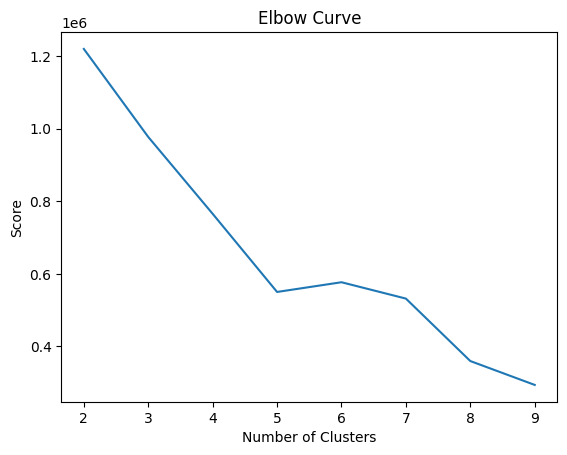

In [60]:
import pandas as pd
import pylab as pl
df_cost = pd.DataFrame(cost[2:])
df_cost.columns = ["cost"]
new_col = range(2,10)
df_cost.insert(0, 'cluster', new_col)
pl.plot(df_cost.cluster, df_cost.cost)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### ii) Building the K-Means Clustering Model

From the plot above, we can see that there is an inflection point that looks like an elbow at four. Due to this, we will procced to build the K-Means algorithm with seven clusters:

In [61]:
KMeans_algo=KMeans(featuresCol='standardized', k=7)
KMeans_fit=KMeans_algo.fit(data_scale_output)

#### iii) Making Predictions

Let's use the model we created to assign clusters to each facility in the dataset:

In [62]:
preds=KMeans_fit.transform(data_scale_output)

preds.show(5,0)

+----+-------------------------------------------------+---------+--------------+-----------+------------------+-----------------------------------------------+------------------------------------------------------------------------------------------------------+----------+
|YEAR|FACILITY_NAME                                    |RECYCLING|ENERGY_RECOVER|TREATMENT  |DISPOSAL          |features                                       |standardized                                                                                          |prediction|
+----+-------------------------------------------------+---------+--------------+-----------+------------------+-----------------------------------------------+------------------------------------------------------------------------------------------------------+----------+
|2008|PHILLIPS 66  - ALLIANCE REFINERY                 |41.6539  |29.0          |5964936.893|638961.5945       |[2008.0,41.6539,29.0,5964936.893,638961.5945]  |[465.3406640287

Notice that there is a "predicition" column in this dataframe that tells us which cluster each facility belongs to:

### Cluster Analysis

The To visualize the recycling, energy recovery, treatment, disposal value of each facility in the dataframe:

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns


# df_viz = preds.select('YEAR', 'RECYCLING', 'ENERGY_RECOVER', 'TREATMENT', 'DISPOSAL', 'prediction')
# df_viz = df_viz.toPandas()
# avg_df = df_viz.groupby(['YEAR'], as_index=False).mean()

# list1 = ['RECYCLING', 'ENERGY_RECOVER', 'TREATMENT', 'DISPOSAL' 'prediction']

# for column in list1:
#     sns.barplot(x='YEAR', y=column, data=avg_df)
#     plt.xlabel('Year')
#     plt.ylabel(column)
#     plt.title(f'Average {column} by Year')
#     plt.show()


In [63]:
cluster_counts = preds.groupBy('prediction').count().orderBy('prediction')

# Show the number of facilities in each cluster
cluster_counts.show()

+----------+------+
|prediction| count|
+----------+------+
|         0|151769|
|         1|   871|
|         2|133478|
|         3|   136|
|         4|   509|
|         5|    17|
|         6|    26|
+----------+------+



Visualiztion of the clusters by prediction

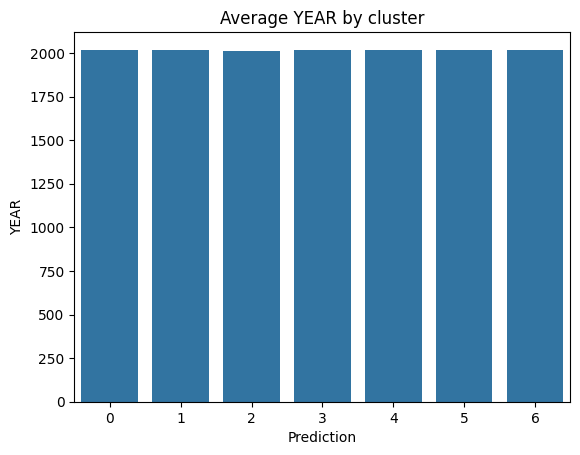

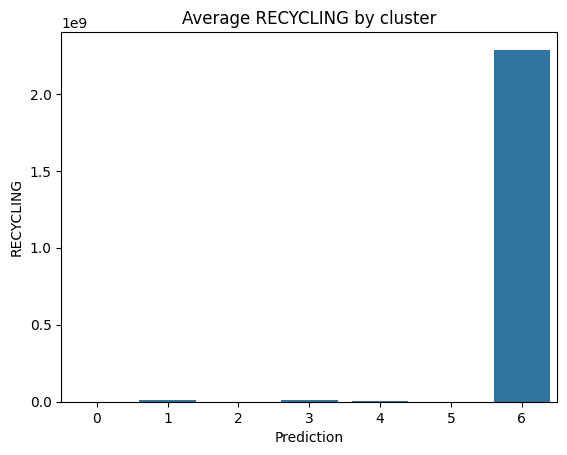

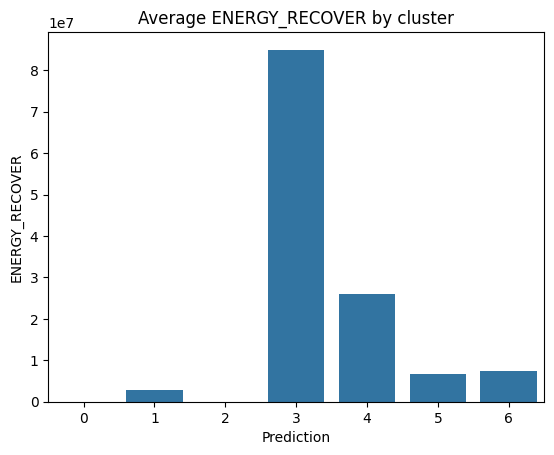

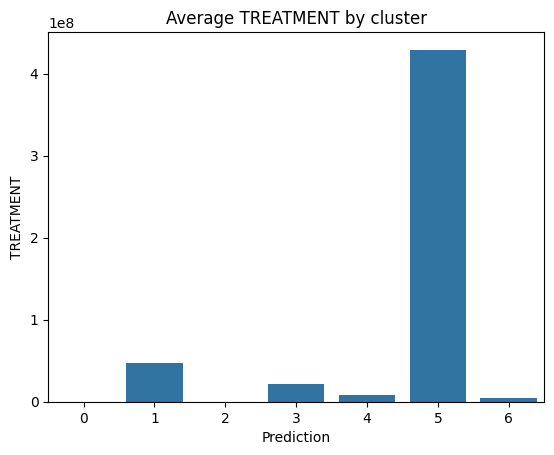

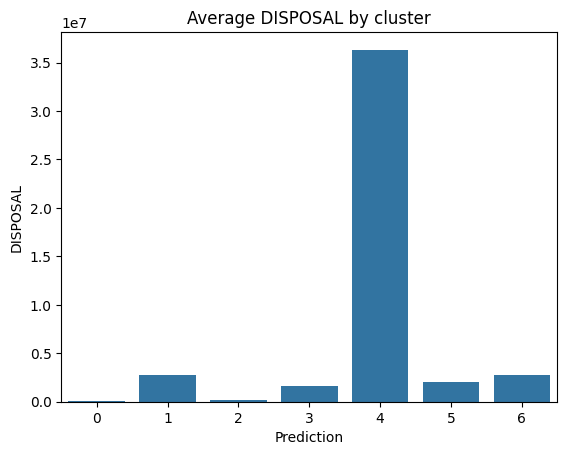

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

df_viz = preds.select('YEAR', 'RECYCLING', 'ENERGY_RECOVER', 'TREATMENT', 'DISPOSAL', 'prediction')
df_viz = df_viz.toPandas()
avg_df = df_viz.groupby(['prediction'], as_index=False).mean()

list1 = ['YEAR', 'RECYCLING', 'ENERGY_RECOVER', 'TREATMENT', 'DISPOSAL']

for column in list1:
    sns.barplot(x='prediction', y=column, data=avg_df)
    plt.xlabel('Prediction')
    plt.ylabel(column)
    plt.title(f'Average {column} by cluster')
    plt.show()

In [65]:
# Calculate the total sum of each column
total_sums = df_viz.groupby('prediction').sum()

# Calculate the percentage of each cluster's contribution to the total value of each column
percentage_df = pd.DataFrame()
for column in list1:
    percentage_df[column] = total_sums[column] / total_sums[column].sum() * 100

# Display the percentage values
print("Percentage values of each cluster in each column:")
print(percentage_df)


Percentage values of each cluster in each column:
                 YEAR  RECYCLING  ENERGY_RECOVER  TREATMENT   DISPOSAL
prediction                                                            
0           53.008892  31.668014       18.507765  29.182173  30.791481
1            0.303695   5.509357        5.615877  33.484389   4.289688
2           46.447493  28.918356       16.394753  25.627990  31.297273
3            0.047430   0.740412       27.392469   2.433417   0.390768
4            0.177475   1.172939       31.360412   3.210674  33.039326
5            0.005934   0.000023        0.271573   5.957913   0.061215
6            0.009081  31.990899        0.457151   0.103444   0.130249


Here is an overview of characteristics displayed by facilities in each cluster:

- Cluster 0: This cluster represents facilities that have a relatively balanced distribution across recycling, treatment, and disposal activities. They have moderate involvement in recycling and treatment activities.

- Cluster 1: Facilities in this cluster have a high involvement in treatment activities compared to other clusters. They have moderate participation in recycling and energy recovery but lower involvement in disposal.

- Cluster 2: These facilities have a similar distribution to Cluster 0 but with slightly higher involvement in disposal activities. They have moderate participation in recycling and treatment activities.

- Cluster 3: Facilities in this cluster have a very high involvement in energy recovery activities compared to other clusters. They have minimal involvement in recycling and disposal.

- Cluster 4: This cluster represents facilities heavily involved in disposal activities. They have minimal involvement in recycling and energy recovery but significant participation in disposal.

- Cluster 5: Facilities in this cluster have a high involvement in treatment activities compared to other clusters. They have moderate participation in recycling and minimal involvement in energy recovery and disposal.

- Cluster 6: This cluster represents facilities heavily involved in recycling activities compared to other clusters. They have minimal involvement in energy recovery, treatment, and disposal.

In [66]:
data1.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- FACILITY_NAME: string (nullable = true)
 |-- RECYCLING: double (nullable = true)
 |-- ENERGY_RECOVER: double (nullable = true)
 |-- TREATMENT: double (nullable = true)
 |-- DISPOSAL: double (nullable = true)
 |-- PROD_WASTE: double (nullable = true)



In [67]:
df1 = data1.drop('FACILITY_NAME')

In [68]:
df1.printSchema()

root
 |-- YEAR: integer (nullable = true)
 |-- RECYCLING: double (nullable = true)
 |-- ENERGY_RECOVER: double (nullable = true)
 |-- TREATMENT: double (nullable = true)
 |-- DISPOSAL: double (nullable = true)
 |-- PROD_WASTE: double (nullable = true)



#### Data Pre-Processing for Supervised Learning Models

In [69]:
from pyspark.ml.feature import VectorAssembler

# Select features and target variable
feature_columns = [ 'YEAR', 'RECYCLING', 'ENERGY_RECOVER', 'TREATMENT', 'DISPOSAL']
target_column = 'PROD_WASTE'

# Create a VectorAssembler to assemble feature columns into a feature vector
assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Transform the DataFrame using the VectorAssembler
data_transformed = assembler.transform(df1)


In [79]:
# Split the data into training and testing sets (70% training, 30% testing)
train_data, test_data = data_transformed.randomSplit([0.7, 0.3], seed=42)

## Linear Regression

In [80]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Train the linear regression model
lr = LinearRegression(featuresCol='features', labelCol=target_column)
lr_model = lr.fit(train_data)

# Make predictions on the testing data
lr_predictions = lr_model.transform(test_data)

# Evaluate the model
lr_evaluator_rmse = RegressionEvaluator(labelCol=target_column, predictionCol='prediction', metricName='rmse')
lr_rmse = lr_evaluator_rmse.evaluate(lr_predictions)
print("Linear Regression - Root Mean Squared Error (RMSE) on test data:", lr_rmse)

# Evaluate the model
lr_evaluator_r2 = RegressionEvaluator(labelCol=target_column, predictionCol='prediction', metricName='r2')
lr_r2 = lr_evaluator_r2.evaluate(lr_predictions)
print("Linear Regression - R-Squared Error (R^2) on test data:", lr_r2)

# Show the predicted values alongside the actual values
lr_predictions.select("prediction", "PROD_WASTE").show(5,0)

Linear Regression - Root Mean Squared Error (RMSE) on test data: 1317398.862722078
Linear Regression - R-Squared Error (R^2) on test data: 0.9977091812057655
+------------------+----------+
|prediction        |PROD_WASTE|
+------------------+----------+
|290.28826103400206|0.0       |
|290.28826103400206|0.0       |
|290.28826103400206|0.0       |
|290.28826103400206|0.0       |
|290.28826103400206|0.0       |
+------------------+----------+
only showing top 5 rows



In [90]:
# import matplotlib.pyplot as plt

# # Collect the predicted and actual values into a Pandas DataFrame
# predictions_df = lr_predictions.select("prediction", "PROD_WASTE").toPandas()

# # Sort the DataFrame by prediction values for better visualization
# predictions_df.sort_values(by='prediction', inplace=True)

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(predictions_df["PROD_WASTE"], label='Actual')
# plt.plot(predictions_df["prediction"], label='Predicted')
# plt.xlabel('Index')
# plt.ylabel('Waste Production')
# plt.title('Actual vs Predicted Waste Production')
# plt.legend()
# plt.show()


In the case of the Linear Regression model:

- RMSE (Root Mean Squared Error): The RMSE value is relatively low, indicating that the model's predictions are close to the actual values on the test data.

- R-squared (R²) Value: The R-squared value is very high, close to 1, indicating that the model explains a large proportion of the variance in the dependent variable compared to the mean of the dependent variable.

## Random Forest Regressor

In [81]:
from pyspark.ml.regression import RandomForestRegressor, DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Random Forest
rf = RandomForestRegressor(featuresCol='features', labelCol=target_column)
rf_model = rf.fit(train_data)

# Make predictions on the testing data
rf_predictions = rf_model.transform(test_data)

# Evaluate the Random Forest model
rf_evaluator_rmse = RegressionEvaluator(labelCol=target_column, predictionCol='prediction', metricName='rmse')
rf_rmse = rf_evaluator_rmse.evaluate(rf_predictions)
print("Random Forest - Root Mean Squared Error (RMSE) on test data:", rf_rmse)

rf_evaluator_r2 = RegressionEvaluator(labelCol=target_column, predictionCol='prediction', metricName='r2')
rf_r2 = rf_evaluator_r2.evaluate(rf_predictions)
print("Random Forest - R-Squared Error (R^2) on test data:", rf_r2)

# Show the predicted values alongside the actual values for Random Forest
rf_predictions.select("prediction", "PROD_WASTE").show(5,0)



Random Forest - Root Mean Squared Error (RMSE) on test data: 26261736.022215754
Random Forest - R-Squared Error (R^2) on test data: 0.08966124434821177
+-----------------+----------+
|prediction       |PROD_WASTE|
+-----------------+----------+
|81164.58906479941|0.0       |
|81164.58906479941|0.0       |
|81164.58906479941|0.0       |
|81164.58906479941|0.0       |
|81164.58906479941|0.0       |
+-----------------+----------+
only showing top 5 rows



In [89]:
# import matplotlib.pyplot as plt

# # Collect the predicted and actual values into a Pandas DataFrame
# predictions_df = rf_predictions.select("prediction", "PROD_WASTE").toPandas()

# # Sort the DataFrame by prediction values for better visualization
# predictions_df.sort_values(by='prediction', inplace=True)

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(predictions_df["PROD_WASTE"], label='Actual')
# plt.plot(predictions_df["prediction"], label='Predicted')
# plt.xlabel('Index')
# plt.ylabel('Waste Production')
# plt.title('Actual vs Predicted Waste Production')
# plt.legend()
# plt.show()


In the case of the Random Forest model:

- RMSE (Root Mean Squared Error): The RMSE value is quite high, indicating that the model's predictions deviate substantially from the actual values on the test data.

- R-squared (R²) Value: The R-squared value is low, indicating that the model explains only a small proportion of the variance in the dependent variable compared to the mean of the dependent variable.

## Decision Tree Regressor

In [82]:
from pyspark.ml.regression import RandomForestRegressor, DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator


# Decision Tree
dt = DecisionTreeRegressor(featuresCol='features', labelCol=target_column)
dt_model = dt.fit(train_data)

# Make predictions on the testing data
dt_predictions = dt_model.transform(test_data)

# Evaluate the Decision Tree model
dt_evaluator_rmse = RegressionEvaluator(labelCol=target_column, predictionCol='prediction', metricName='rmse')
dt_rmse = dt_evaluator_rmse.evaluate(dt_predictions)
print("Decision Tree - Root Mean Squared Error (RMSE) on test data:", dt_rmse)

dt_evaluator_r2 = RegressionEvaluator(labelCol=target_column, predictionCol='prediction', metricName='r2')
dt_r2 = dt_evaluator_r2.evaluate(dt_predictions)
print("Decision Tree - R-Squared Error (R^2) on test data:", dt_r2)

# Show the predicted values alongside the actual values for Decision Tree
dt_predictions.select("prediction", "PROD_WASTE").show(5,0)


Decision Tree - Root Mean Squared Error (RMSE) on test data: 25765100.381558117
Decision Tree - R-Squared Error (R^2) on test data: 0.12376651267814331
+-----------------+----------+
|prediction       |PROD_WASTE|
+-----------------+----------+
|71750.30481256406|0.0       |
|71750.30481256406|0.0       |
|71750.30481256406|0.0       |
|71750.30481256406|0.0       |
|71750.30481256406|0.0       |
+-----------------+----------+
only showing top 5 rows



In [ ]:
# import matplotlib.pyplot as plt

# # Collect the predicted and actual values into a Pandas DataFrame
# predictions_df = dt_predictions.select("prediction", "PROD_WASTE").toPandas()

# # Sort the DataFrame by prediction values for better visualization
# predictions_df.sort_values(by='prediction', inplace=True)

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(predictions_df["PROD_WASTE"], label='Actual')
# plt.plot(predictions_df["prediction"], label='Predicted')
# plt.xlabel('Index')
# plt.ylabel('Waste Production')
# plt.title('Actual vs Predicted Waste Production')
# plt.legend()
# plt.show()


In [91]:
# spark.stop()

In the case of the Decision Tree model:

- RMSE (Root Mean Squared Error): The RMSE value is very high, indicating that the model's predictions deviate significantly from the actual values on the test data.

- R-squared (R²) Value: The R-squared value is negative, which is unusual and generally indicates that the model is performing worse than a model that simply predicts the mean of the target variable.

### Conclusion
Based on the TRI data, Two types of Machine Learning models were used to predict (Supervised Learning model and Unsupervised Learning model).

- Supervised Learning Model:
For this model three algorithms (Linear Regression, Random Forest, Decision Tree) were used to predict the production waste of the data over the years. Of the three models Linear Regression model seems to work the best for the chosen features.Root mean square error and R-squared value are the metrics used to evaluate the model's performance.

- Unsupervised Learning Model:
For this model K-means clustering was used to predict the facilites segemntation based on the Waste Management Involvement Activities.an elbow plot was utlilsed to determine the optimized number of clusters.